In [965]:
import glob
import shutil
from tqdm.notebook import tqdm
import random
import pandas as pd
import numpy as np


# converting to yolo annotation
import xml.etree.ElementTree as ET
import os
import json


def xml_to_yolo(bbox, w, h):
    # xmin, ymin, xmax, ymax
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h
    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h
    return [x_center, y_center, width, height]

In [966]:
annot_list = glob.glob('./RDD2022_all_countries/Norway/train/annotations/xmls/*.xml')

In [967]:
data = {'labels': [], 'images': []}

classes = []

for idx, file in enumerate(tqdm(annot_list)):

    basename = os.path.basename(file)
    filename = os.path.splitext(basename)[0]

    # check if the label contains the corresponding image file

    image_dir = '/'.join(file.split('/')[:4])+'/images'
    image_file = os.path.join(image_dir, filename+'.jpg')
    
    if not os.path.exists(image_file):
        print(filename, 'image does not exist!')
        continue
        
    data['labels'].append(annot_list[idx])
    data['images'].append(image_file)

  0%|          | 0/8161 [00:00<?, ?it/s]

In [968]:
for idx, file in enumerate(tqdm(data['labels'])):

    # parse the content of the xml file
    tree = ET.parse(file)
    root = tree.getroot()
    
    objects = root.findall('object')
    if objects:
        for obj in objects:
            label = obj.find("name").text
            # check for new classes and append to list
            if label not in classes:
                classes.append(label)
                data[label] = np.zeros(len(data['labels']), dtype=int)
            data[label][idx] += 1
    else:
        label = "Empty"
        if label not in classes:
            classes.append(label)
            data[label] = np.zeros(len(annot_list), dtype=int)
        data[label][idx] += 1
        
df = pd.DataFrame(data)
df = df.sample(frac=1).reset_index(drop=True)

df

  0%|          | 0/8161 [00:00<?, ?it/s]

,labels,images,Empty,D00,D10,D40,D20
0,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
1,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
2,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
3,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
4,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,13,0,0,0
...,...,...,...,...,...,...,...
8156,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
8157,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,1,0,0,0
8158,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,3,0,0
8159,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,6,0,0,0


In [969]:
def plot_data(df):
    frequencies = df.mean(axis=0).sort_values()

    _ = frequencies.plot(title='Dataset for analyzing cracks', 
                         kind='barh', 
                         figsize=(12, 12),
                         color='#479EF8')

,labels,images,Empty,D00,D10,D40,D20
0,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
1,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
2,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
3,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
4,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,13,0,0,0
...,...,...,...,...,...,...,...
8156,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
8157,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,1,0,0,0
8158,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,3,0,0
8159,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,6,0,0,0


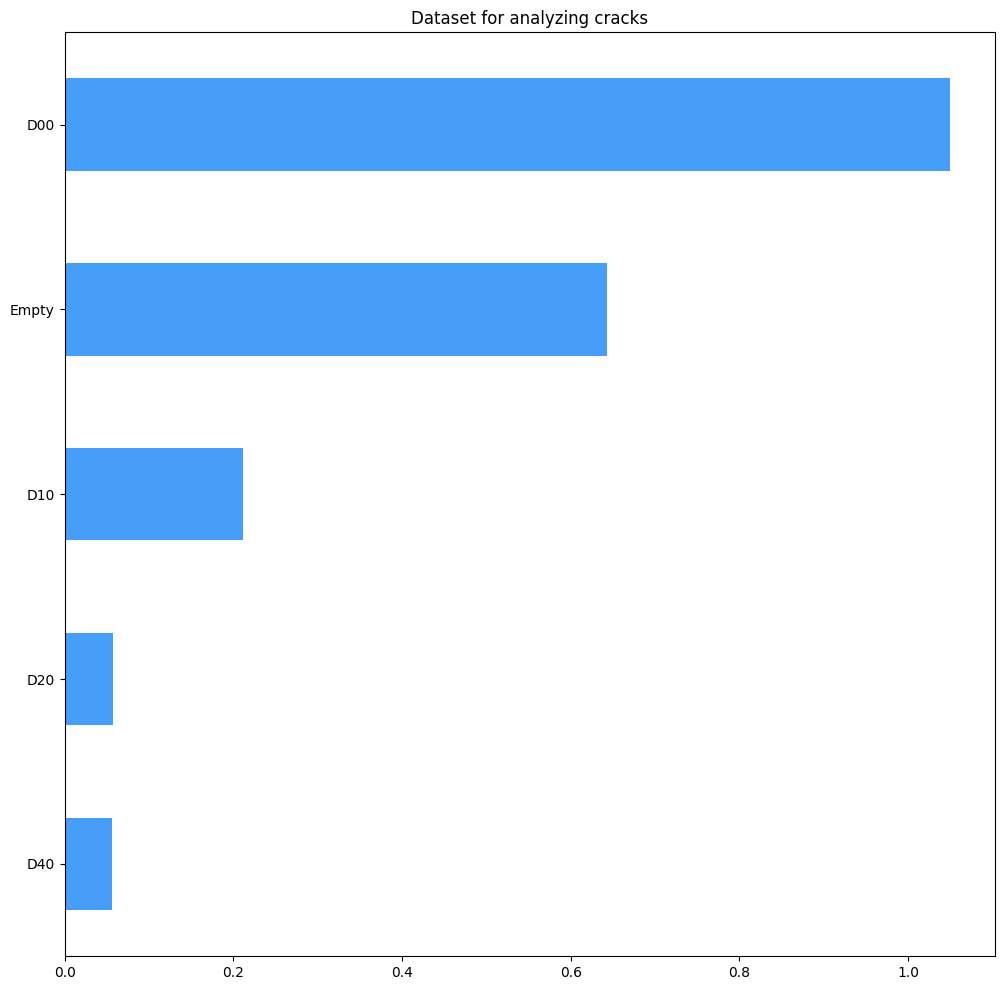

In [970]:
plot_data(df.iloc[:, 2:])

df

In [971]:
trim_df = df.loc[(df['D00'] == df[classes].sum(axis=1)) & (df['D00'] > 0)]

print("Shape of original dataframe:", df.shape)
#Prints shape of dataframe containing all rows where D00 exclusively is 0
print("Trimmer dataframe:", trim_df.shape)
print("Number of D00 cracks detected:", df['D00'].sum())
print("Number of D10 cracks detected:", df['D10'].sum())

Shape of original dataframe: (8161, 7)
Trimmer dataframe: (1580, 7)
Number of D00 cracks detected: 8570
Number of D10 cracks detected: 1730


In [972]:
trim_df = trim_df.sort_values(by=['D00'], ascending=False)
print("Number of D00 detections in trimmer_df:", trim_df['D00'].sum())


trim_df

Number of D00 detections in trimmer_df: 3796


,labels,images,Empty,D00,D10,D40,D20
4767,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,20,0,0,0
5254,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,19,0,0,0
3318,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,16,0,0,0
1836,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,16,0,0,0
4654,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,15,0,0,0
...,...,...,...,...,...,...,...
279,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,1,0,0,0
5192,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,1,0,0,0
2473,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,1,0,0,0
5198,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,1,0,0,0


In [973]:
cond = df['labels'].isin(trim_df['labels'])
df.drop(df[cond].index, inplace = True)

df.reset_index(drop=True, inplace=True)

print(df.shape)

(6581, 7)


Number of D00 detections after processing: 4774
Number of D10 detections after processing: 1730


/var/folders/k6/t__53lhj7j59kljh21yj7r8m0000gn/T/ipykernel_50355/293938576.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  frequencies = df.mean(axis=0).sort_values()


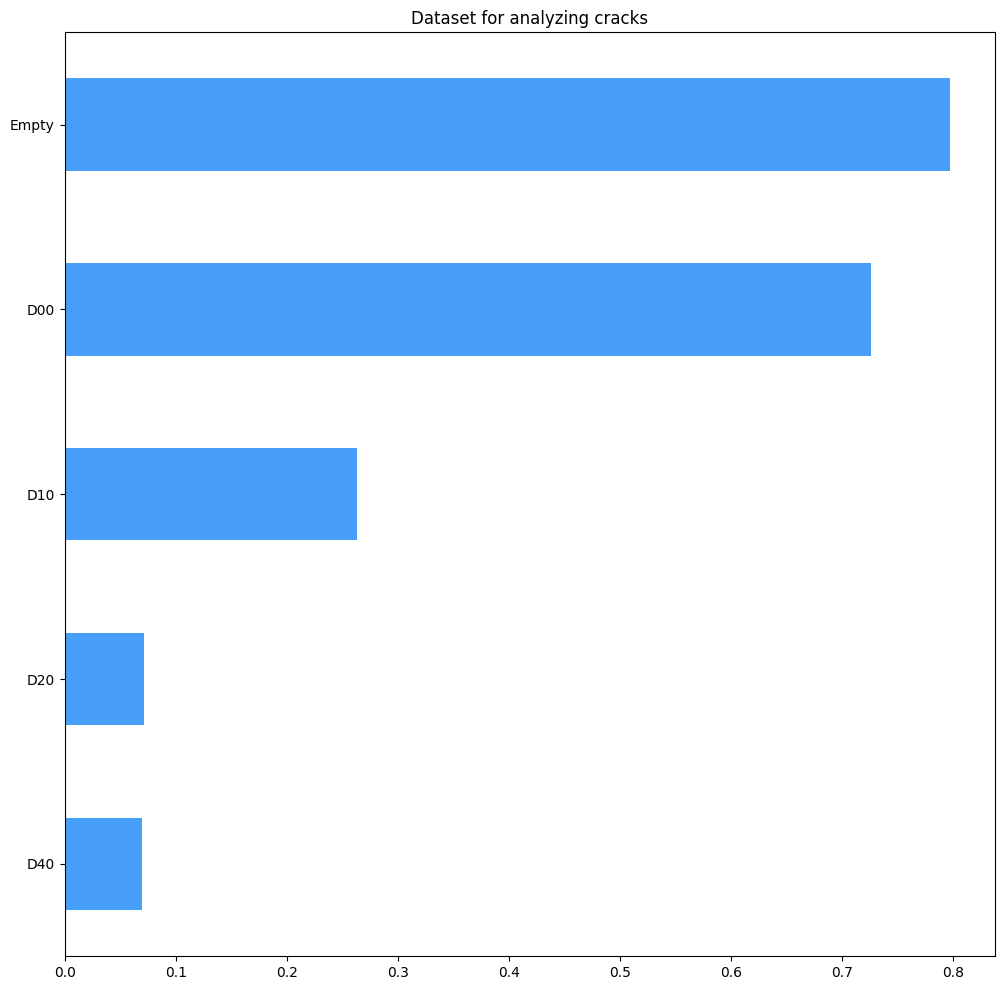

In [974]:
plot_data(df[2:])

print("Number of D00 detections after processing:", df['D00'].sum())
print("Number of D10 detections after processing:", df['D10'].sum())

In [975]:
def get_exclusive_values(df, col_name):
    tmp_df = df.loc[(df[col_name] == df[classes].sum(axis=1)) & (df[col_name] > 0)]
    tmp_df = tmp_df.sort_values(by=[col_name], ascending=False)
    return tmp_df

In [976]:
df

,labels,images,Empty,D00,D10,D40,D20
0,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
1,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
2,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
3,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
4,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
...,...,...,...,...,...,...,...
6576,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
6577,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
6578,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
6579,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,3,0,0


In [977]:
#Removing rows where there are no detectinos
print("Shape of dataframe before removing 'zero rows'", df.shape)
df = df.loc[df[classes].sum(axis=1) != 0]
df.reset_index(drop=True, inplace=True)
print("Shape of dataframe after removing 'zero rows'", df.shape)

Shape of dataframe before removing 'zero rows' (6581, 7)
Shape of dataframe after removing 'zero rows' (6581, 7)


In [978]:
tmp_df = df.loc[(df["D00"] != 0)]
tmp_df = tmp_df.sort_values(by=["D00"], ascending=False)
tmp_df.reset_index(drop=True, inplace=True)
tmp_df = tmp_df.iloc[:200, :]

print(tmp_df['D00'].sum())

print("Number of D00 detections after processing:", df['D00'].sum())
print("Number of D10 detections after processing:", df['D10'].sum())
print("Number of D20 detections after processing:", df['D20'].sum())
print("Number of D40 detections after processing:", df['D40'].sum())


tmp_df

2411
Number of D00 detections after processing: 4774
Number of D10 detections after processing: 1730
Number of D20 detections after processing: 468
Number of D40 detections after processing: 461


,labels,images,Empty,D00,D10,D40,D20
0,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,36,8,0,0
1,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,29,2,0,0
2,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,24,4,0,1
3,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,24,10,0,0
4,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,24,1,0,1
...,...,...,...,...,...,...,...
195,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,8,1,2,1
196,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,8,1,0,0
197,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,8,0,1,0
198,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,8,1,0,0


Number of D00 detections after processing: 2363
Number of D10 detections after processing: 1292
Number of D20 detections after processing: 349
Number of D40 detections after processing: 419


/var/folders/k6/t__53lhj7j59kljh21yj7r8m0000gn/T/ipykernel_50355/293938576.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  frequencies = df.mean(axis=0).sort_values()


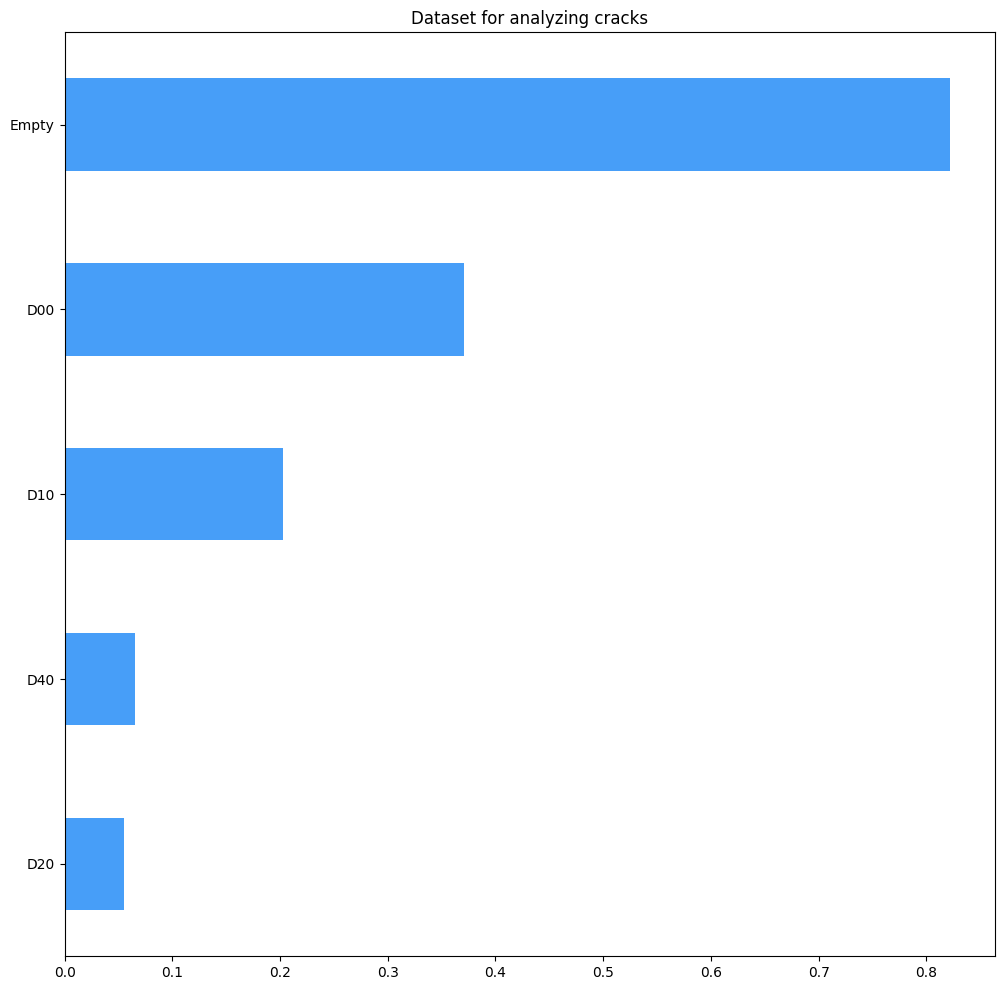

In [979]:
cond = df['labels'].isin(tmp_df['labels'])
df.drop(df[cond].index, inplace = True)

plot_data(df[2:])


print("Number of D00 detections after processing:", df['D00'].sum())
print("Number of D10 detections after processing:", df['D10'].sum())
print("Number of D20 detections after processing:", df['D20'].sum())
print("Number of D40 detections after processing:", df['D40'].sum())

/var/folders/k6/t__53lhj7j59kljh21yj7r8m0000gn/T/ipykernel_50355/293938576.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  frequencies = df.mean(axis=0).sort_values()


,labels,images,Empty,D00,D10,D40,D20
772,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,0,0,2
1261,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,0,0,2
4106,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,0,0,2
259,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,0,0,1
337,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,0,0,1
...,...,...,...,...,...,...,...
931,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,0,5,0
2921,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,0,6,0
3754,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,0,7,3
1328,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,0,8,0


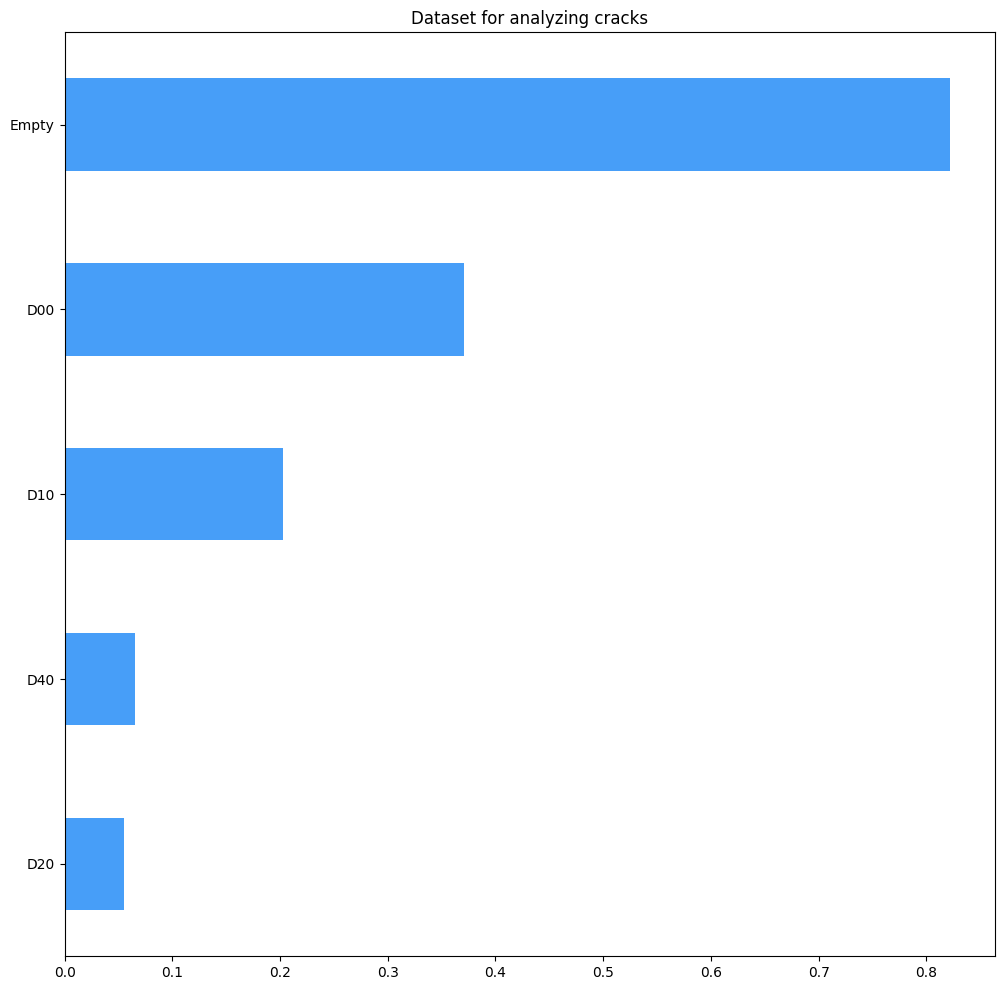

In [980]:
tmp_df = df.loc[(df["D00"] == 0) & (df["Empty"] == 0) & (df["D10"] == 0)]
tmp_df = tmp_df.sort_values(['D40', 'D20'],
              ascending = [True, False,])


plot_data(df[2:])

tmp_df

/var/folders/k6/t__53lhj7j59kljh21yj7r8m0000gn/T/ipykernel_50355/4103790867.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp_df[:90])
/var/folders/k6/t__53lhj7j59kljh21yj7r8m0000gn/T/ipykernel_50355/4103790867.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp_df[:90])
/var/folders/k6/t__53lhj7j59kljh21yj7r8m0000gn/T/ipykernel_50355/4103790867.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp_df[:90])
/var/folders/k6/t__53lhj7j59kljh21yj7r8m0000gn/T/ipykernel_50355/4103790867.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp_df[:90])
/var/folders/k6/t__5

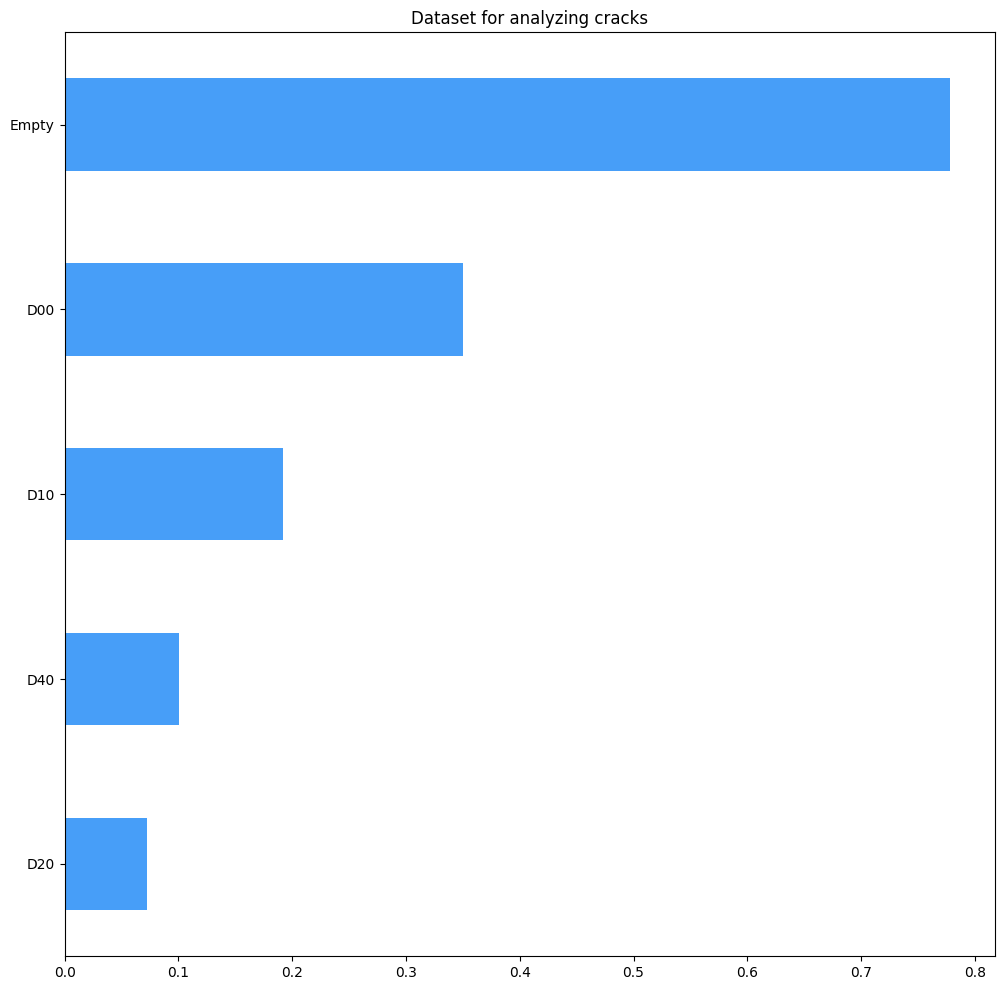

In [981]:
df = df.append(tmp_df[:90])
df = df.append(tmp_df[:90])
df = df.append(tmp_df[:90])
df = df.append(tmp_df[:90])

plot_data(df)

In [982]:
tmp_df = df.loc[df["Empty"] == 1]

tmp_df = tmp_df.iloc[:4700, :]
tmp_df.reset_index(drop=True, inplace=True)
tmp_df

,labels,images,Empty,D00,D10,D40,D20
0,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
1,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
2,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
3,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
4,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
...,...,...,...,...,...,...,...
4695,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
4696,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
4697,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
4698,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0


/var/folders/k6/t__53lhj7j59kljh21yj7r8m0000gn/T/ipykernel_50355/293938576.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  frequencies = df.mean(axis=0).sort_values()


,labels,images,Empty,D00,D10,D40,D20
10,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,1,0,0
11,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,1,0,0,1
24,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,3,1,0,0
28,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,5,1,0,0
48,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,3,2,0,0
...,...,...,...,...,...,...,...
6395,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,0,1,0
6400,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,0,1,0
6428,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,0,1,0
1401,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,0,2,0


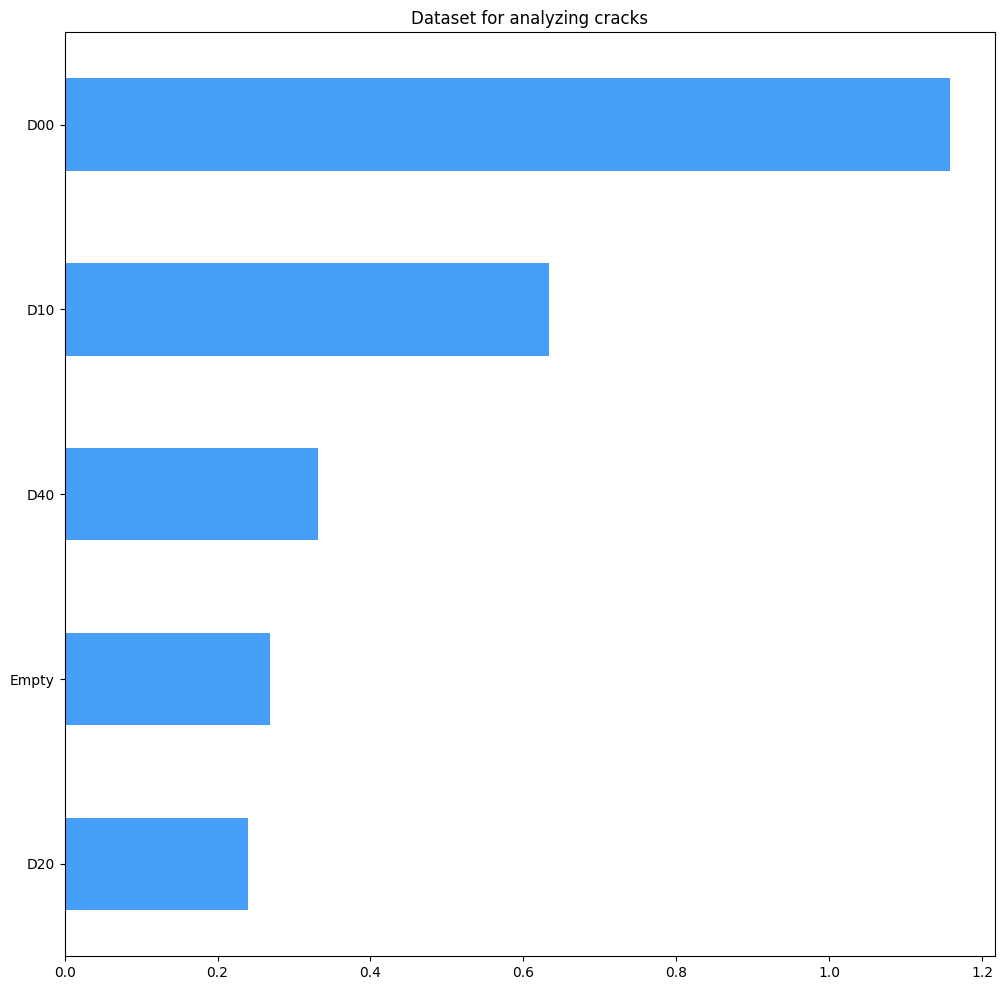

In [983]:
cond = df['labels'].isin(tmp_df['labels'])
df.drop(df[cond].index, inplace = True)

plot_data(df[2:])

df

In [984]:
import numpy as np

split_data = []

for idx, row in tqdm(df.iterrows()):
    if idx <= df.shape[0]*0.75:
        split_data.append('train')
    else:
        split_data.append('val')

        
df['split'] = split_data

df.reset_index(drop=True, inplace=True)

0it [00:00, ?it/s]

In [985]:
df.to_csv('training_data.csv')

df

,labels,images,Empty,D00,D10,D40,D20,split
0,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,1,0,0,train
1,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,1,0,0,1,train
2,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,3,1,0,0,train
3,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,5,1,0,0,train
4,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,3,2,0,0,train
...,...,...,...,...,...,...,...,...
2036,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,0,1,0,val
2037,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,0,1,0,val
2038,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,0,1,0,val
2039,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,0,2,0,train


In [986]:
os.makedirs('./dataset/train/images')
os.makedirs('./dataset/train/labels')
os.makedirs('./dataset/val/images')
os.makedirs('./dataset/val/labels')

FileExistsError: [Errno 17] File exists: './dataset/train/images'

In [987]:
for idx, row in tqdm(df.iterrows()):
    
    annotation = row['labels']
    image = row['images']
    
    result = []

    # parse the content of the xml file
    tree = ET.parse(annotation)
    root = tree.getroot()
    width = int(root.find("size").find("width").text)
    height = int(root.find("size").find("height").text)
    
    objects = root.findall('object')
    if objects:
        for obj in objects:
            label = obj.find("name").text
            index = new_classes.index(label)
            pil_bbox = [int(float(x.text)) for x in obj.find("bndbox")]
            yolo_bbox = xml_to_yolo(pil_bbox, width, height)
            # convert data to string
            bbox_string = " ".join([str(x) for x in yolo_bbox])
            result.append(f"{index} {bbox_string}")
    else:
        result.append('')
        

    if result:
        if row['split'] == 'train':
            dest = 'dataset/train'
        else:
            dest = 'dataset/val'
        
        
        # generate a YOLO format text file for each xml file
        with open(dest+'/labels/'+str(idx).zfill(6)+'.txt', 'w') as f:
            f.write('\n'.join(result))
            
        # moving images
        shutil.copy(
            image,
            dest+'/images/'+str(idx).zfill(6)+'.jpg'
        )
        
# generate the classes file as reference
with open('classes.txt', 'w', encoding='utf8') as f:
    f.write(json.dumps(new_classes))

0it [00:00, ?it/s]

NameError: name 'classes_to_drop' is not defined

In [96]:
import cv2
import matplotlib.pyplot as plt

def plot_bounding_box(image_path):
    img = cv2.imread(image_path)
    dh, dw, _ = img.shape

    split_string = image_path.split('/')
    

    
    label_path = '/'.join((split_string[:2]))+'/labels/'+split_string[3].split('.')[0]+'.txt'
    fl = open(label_path, 'r')
    data = fl.readlines()
    fl.close()

    for dt in data:

        # Split string to float
        _, x, y, w, h = map(float, dt.split(' '))

        # Taken from https://github.com/pjreddie/darknet/blob/810d7f797bdb2f021dbe65d2524c2ff6b8ab5c8b/src/image.c#L283-L291
        # via https://stackoverflow.com/questions/44544471/how-to-get-the-coordinates-of-the-bounding-box-in-yolo-object-detection#comment102178409_44592380
        l = int((x - w / 2) * dw)
        r = int((x + w / 2) * dw)
        t = int((y - h / 2) * dh)
        b = int((y + h / 2) * dh)

        if l < 0:
            l = 0
        if r > dw - 1:
            r = dw - 1
        if t < 0:
            t = 0
        if b > dh - 1:
            b = dh - 1

        cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)

    plt.imshow(img)
    plt.show()



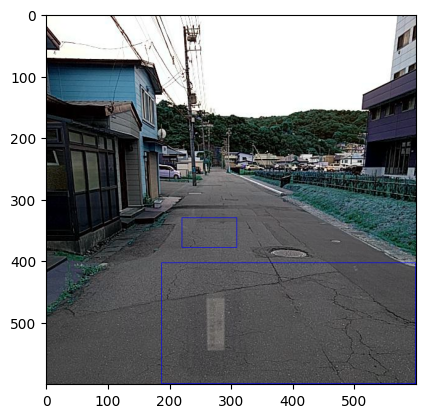

In [97]:
plot_bounding_box('dataset/train/images/000015.jpg')

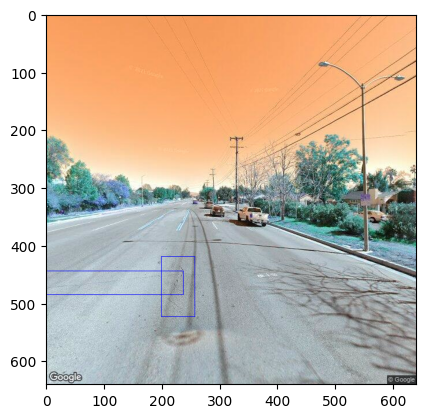

In [98]:
plot_bounding_box('dataset/train/images/000028.jpg')

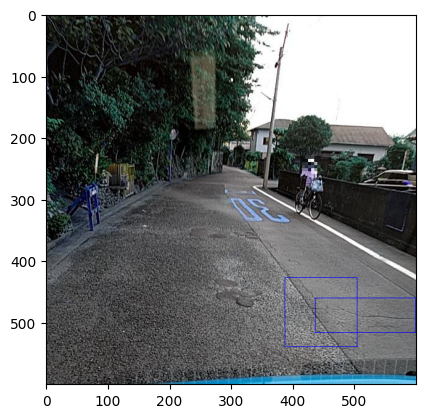

In [99]:
plot_bounding_box('dataset/train/images/012008.jpg')